In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
data=pd.read_csv('TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


Visualize the data

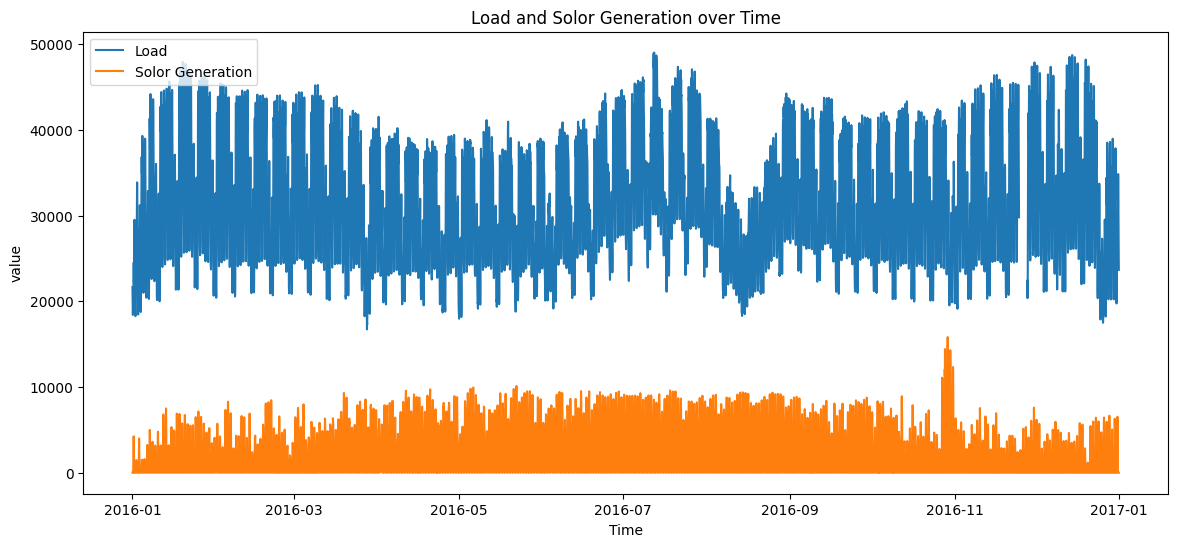

In [67]:
# convert timestamp to datetime
data['utc_timestamp']=pd.to_datetime(data['utc_timestamp'])

# ploting data
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'],data['IT_load_new'], label='Load')
plt.plot(data['utc_timestamp'],data['IT_solar_generation'], label='Solor Generation')

plt.xlabel('Time')
plt.ylabel('value')

plt.legend()
plt.title('Load and Solor Generation over Time')
plt.show()

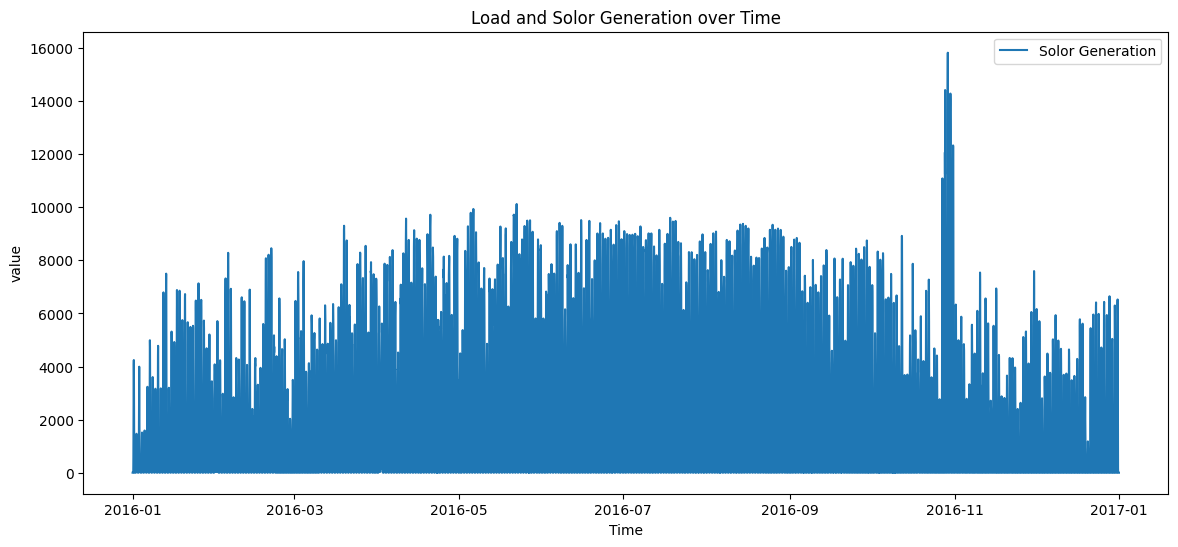

In [68]:
# convert timestamp to datetime
data['utc_timestamp']=pd.to_datetime(data['utc_timestamp'])

# ploting data
plt.figure(figsize=(14,6))
#plt.plot(data['utc_timestamp'],data['IT_load_new'], label='Load')
plt.plot(data['utc_timestamp'],data['IT_solar_generation'], label='Solor Generation')

plt.xlabel('Time')
plt.ylabel('value')

plt.legend()
plt.title('Load and Solor Generation over Time')
plt.show()

In [69]:
data.isnull().sum()

utc_timestamp           0
IT_load_new            72
IT_solar_generation     0
dtype: int64

In [70]:
# fill missing values
data['IT_load_new'].fillna(method='ffill', inplace=True)

data.isnull().sum()

C:\Users\Rakib\AppData\Local\Temp\ipykernel_5196\3233997974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IT_load_new'].fillna(method='ffill', inplace=True)
C:\Users\Rakib\AppData\Local\Temp\ipykernel_5196\3233997974.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['IT_load_new'].fillna(method='ffill', inplace=True)


utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64

In [71]:
from statsmodels.tsa.stattools import adfuller

# ADF function
def adf_test(timeseries):
  print('Results of Dickey-Fuller Test:')
  dftest= adfuller(timeseries, autolag='AIC')
  dfoutput= pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

In [72]:
# perform augmented dickey-fuller test
print("ADF test for 'IT_load_new' after filling missing values")
adf_test(data['IT_load_new'])
print("======================================================")
print("ADF test for 'IT_solar_generation' after filling missing values")
adf_test(data['IT_solar_generation'])

ADF test for 'IT_load_new' after filling missing values
Results of Dickey-Fuller Test:
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64
ADF test for 'IT_solar_generation' after filling missing values
Results of Dickey-Fuller Test:
Test Statistic                -5.741335e+00
p-value                        6.265438e-07
#Lags Used                     3.600000e+01
Number of Observations Used    8.747000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861870e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


Build ARIMA model for "IT_load_new"

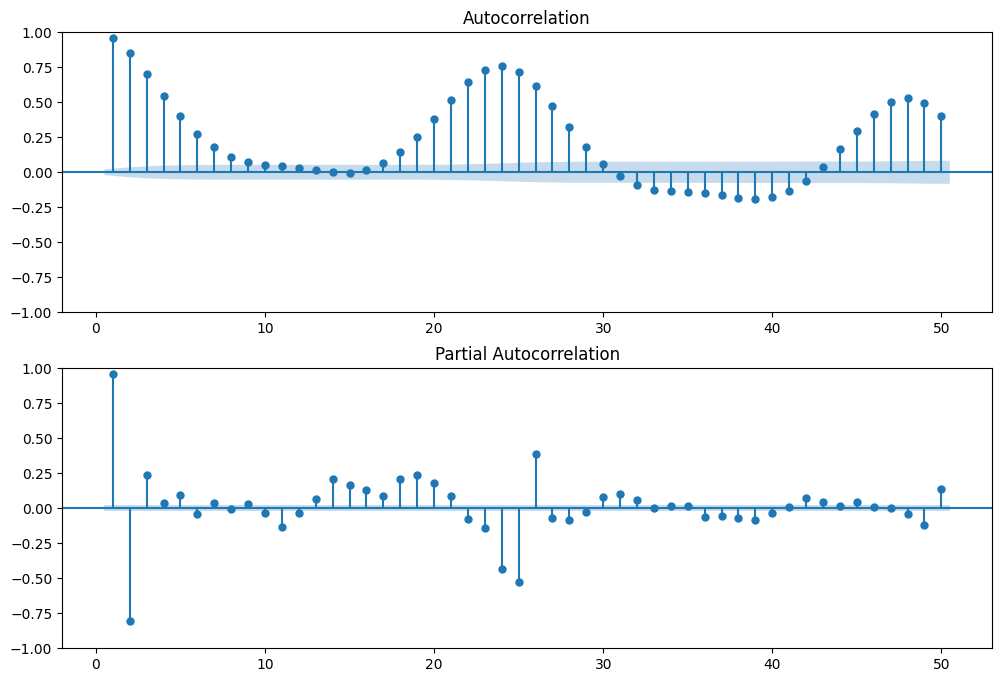

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(data['IT_load_new'], lags=50, zero=False, ax=ax1)
plot_pacf(data['IT_load_new'], lags=50, zero=False, ax=ax2)
plt.show()